In [201]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.22"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "/media/roasted_kernel/MLData/machine_learning/HOML"
CHAPTER_ID = "Workshop4Classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [20]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
len(data.feature_names)

30

In [32]:
X, y = load_breast_cancer(return_X_y=True)

In [33]:
X.shape

(569, 30)

In [39]:
print(type(y[0]))
data.target_names

<class 'numpy.int64'>


array(['malignant', 'benign'], dtype='<U9')

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [36]:
from sklearn.linear_model import SGDClassifier

sgd_clas = SGDClassifier(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_clas.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.1, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty=None,
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [155]:
y_pred = sgd_clas.predict(X_test)

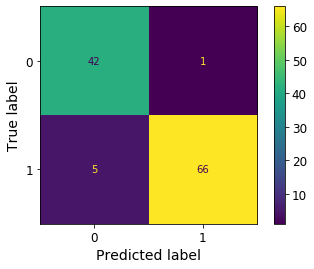

In [171]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(sgd_clas, X_test, y_test, normalize=None)

In [172]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=data.target_names))conda install -c conda-forge pydotplus

              precision    recall  f1-score   support

   malignant       0.89      0.98      0.93        43
      benign       0.99      0.93      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



In [64]:
y_scores = sgd_clas.decision_function([X_train[0]])
y_scores

array([1510418.73461964])

In [173]:
from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(sgd_clas, X_test, y_test, cv=10,
                             method="decision_function",n_jobs = -1)

In [174]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

Saving figure precision_recall_vs_threshold_plot


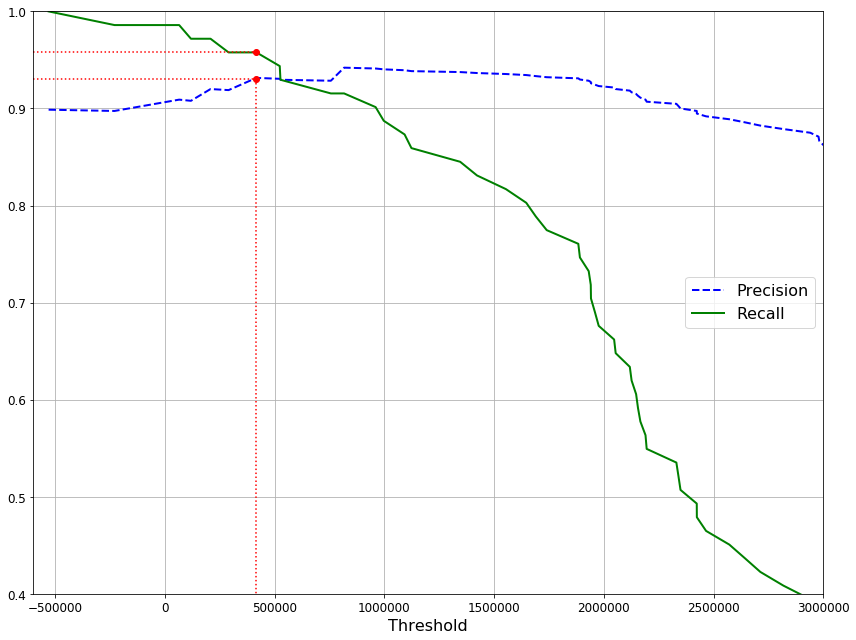

In [182]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-600000, 3000000, 0.4, 1.0])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.93)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.93)]


plt.figure(figsize=(12, 9))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.93], "r:")                 # Not shown
plt.plot([-600000, threshold_90_precision], [0.93, 0.93], "r:")                                # Not shown
plt.plot([-600000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.93], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
save_fig("precision_recall_vs_threshold_plot")                                              # Not shown
plt.show()

Saving figure precision_vs_recall_plot


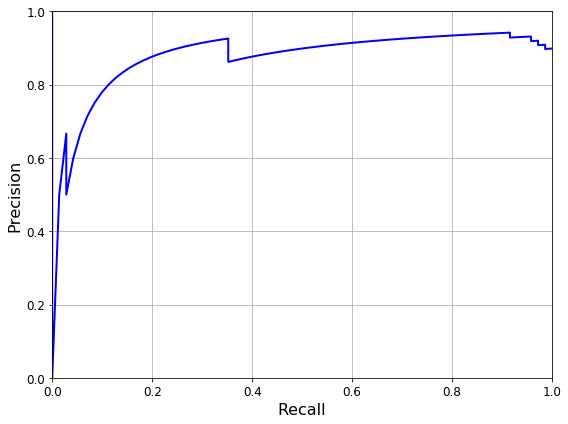

In [183]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
#plt.plot([0.4368, 0.4368], [0., 0.9], "r:")
#plt.plot([0.0, 0.4368], [0.9, 0.9], "r:")
#plt.plot([0.4368], [0.9], "ro")
save_fig("precision_vs_recall_plot")
plt.show()

In [184]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_scores)

Saving figure roc_curve_plot


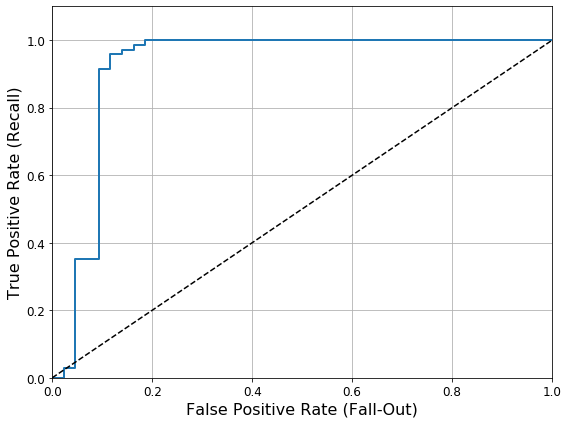

In [188]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1.1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
#plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
#plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
#plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
save_fig("roc_curve_plot")                         # Not shown
plt.show()

In [186]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_scores)

0.9200786112020963

In [198]:
from sklearn import tree
forest_clf = tree.DecisionTreeClassifier(random_state=42)
clf = forest_clf.fit(X_train, y_train)

In [203]:
matplotlib.rcParams['figure.dpi'] = 200
tree.plot_tree(clf)
plt.show()

NameError: name 'matplotlib' is not defined

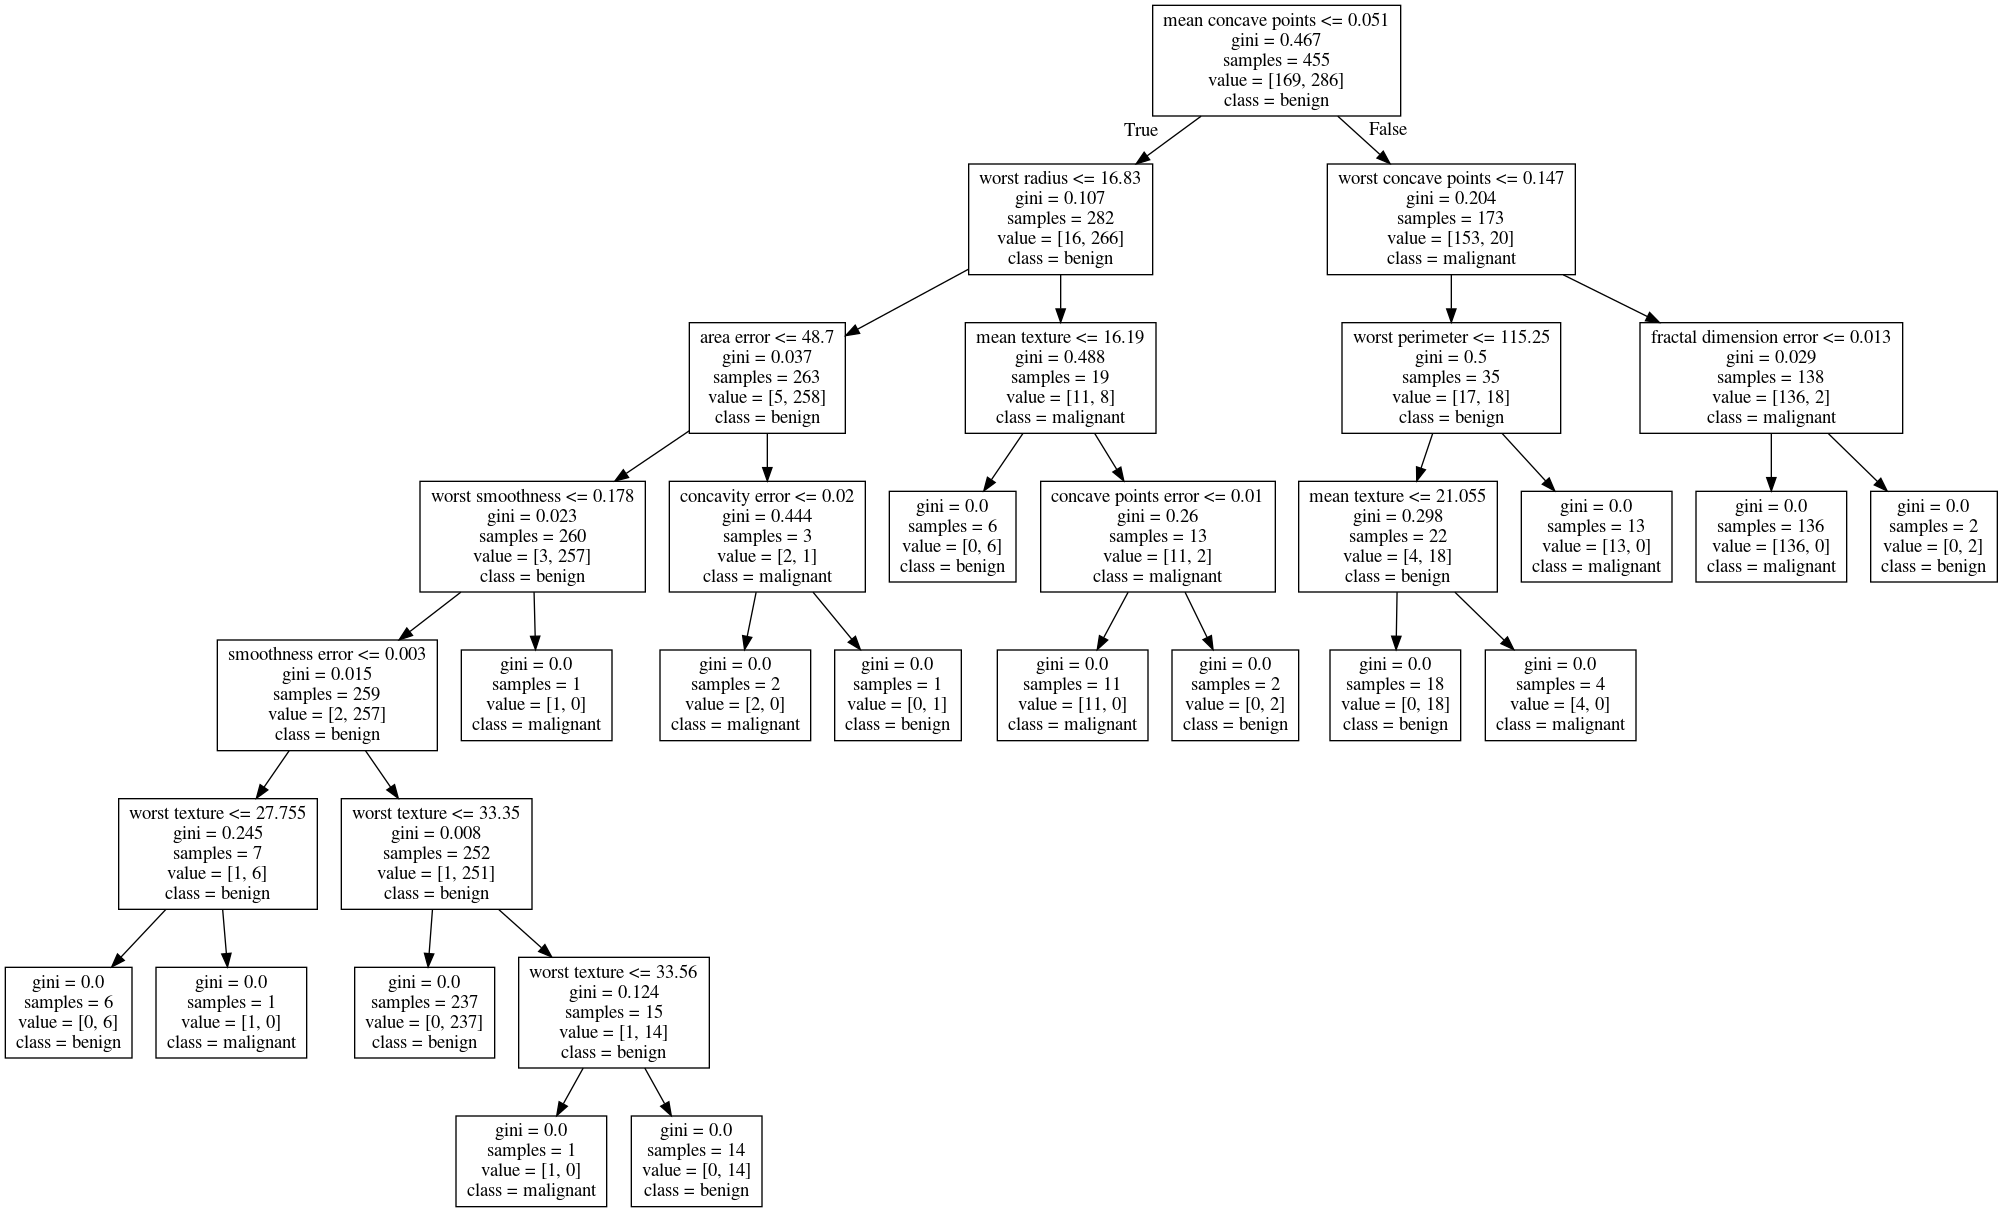

In [206]:
from IPython.display import Image

import pydotplus
# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=data.feature_names,  
                                class_names=data.target_names)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [207]:
y_probas_forest = cross_val_predict(forest_clf, X_test, y_test, cv=10,
                                    method="predict_proba")

In [209]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_test,y_scores_forest)

Saving figure roc_curve_comparison_plot


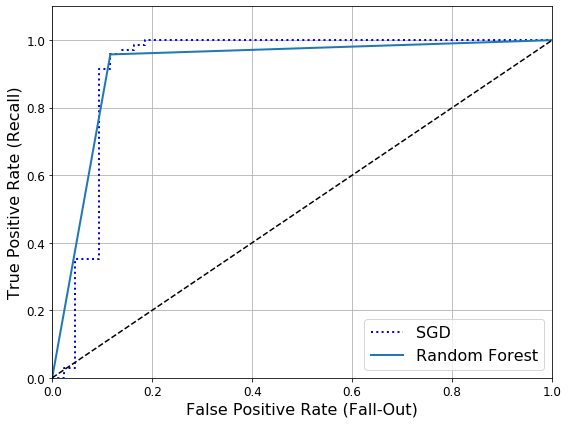

In [210]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
#plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:")
#plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")
#plt.plot([4.837e-3], [0.4368], "ro")
#plt.plot([4.837e-3, 4.837e-3], [0., 0.9487], "r:")
#plt.plot([4.837e-3], [0.9487], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

In [211]:
y_pred_forest = forest_clf.predict(X_test)
print(classification_report(y_test, y_pred_forest, target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       0.93      0.93      0.93        43
      benign       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

